In [85]:
#Import Pandas for Data exploration
import pandas as pd

In [87]:
# Load the dataset
movies = pd.read_csv('16k_Movies.csv')

movies.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",This masterwork by Krzysztof Kieślowski is one...,7.4,118,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,8.3,241,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970","Set in Rome in the 1930s, this re-release of B...",7.3,106,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004","Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",3 h 7 m,"Drama,History"


In [89]:
# Check for missing values and data types
movies.info()
movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16290 non-null  int64  
 1   Title                16290 non-null  object 
 2   Release Date         16290 non-null  object 
 3   Description          16290 non-null  object 
 4   Rating               12846 non-null  float64
 5   No of Persons Voted  12829 non-null  object 
 6   Directed by          16283 non-null  object 
 7   Written by           15327 non-null  object 
 8   Duration             16277 non-null  object 
 9   Genres               16285 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


Unnamed: 0                0
Title                     0
Release Date              0
Description               0
Rating                 3444
No of Persons Voted    3461
Directed by               7
Written by              963
Duration                 13
Genres                    5
dtype: int64

In [91]:
# Convert 'Release Date' to datetime format
movies['Release Date'] = pd.to_datetime(movies['Release Date'], errors='coerce')

# Remove duplicates if any
movies = movies.drop_duplicates()

# Handle missing values (for example, dropping rows with missing critical columns)
movies.dropna(subset=['Title', 'Rating'], inplace=True)

# Fill missing values in 'Description' or other columns if necessary
movies['Description'] = movies['Description'].fillna('No description available')

import re
import numpy as np

# Function to convert 'h m' format to total minutes
def convert_duration_to_minutes(duration_str):
    if isinstance(duration_str, str):
        # Regular expression to capture hours and minutes
        match = re.match(r'(?:(\d+)\s*h)?\s*(?:(\d+)\s*m)?', duration_str)
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
    return np.nan  # Return NaN if the format doesn't match

# Apply the function to the 'Duration' column
movies['Duration'] = movies['Duration'].apply(convert_duration_to_minutes)

# Remove commas and convert the column to float
movies['No of Persons Voted'] = movies['No of Persons Voted'].str.replace(',', '')

# Convert the cleaned column to float
movies['No of Persons Voted'] = pd.to_numeric(movies['No of Persons Voted'], errors='coerce')



In [93]:
movies.head()

,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
0,0,Dekalog (1988),1996-03-22,This masterwork by Krzysztof Kieślowski is one...,7.4,118.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz",572.0,Drama
1,1,Three Colors: Red,1994-11-23,Krzysztof Kieslowski closes his Three Colors t...,8.3,241.0,Krzysztof Kieslowski,"Krzysztof Kieslowski, Krzysztof Piesiewicz, Ag...",99.0,"Drama,Mystery,Romance"
2,2,The Conformist,1970-10-22,"Set in Rome in the 1930s, this re-release of B...",7.3,106.0,Bernardo Bertolucci,"Alberto Moravia, Bernardo Bertolucci",107.0,Drama
3,3,Tokyo Story,1972-03-13,Yasujiro Ozu’s Tokyo Story follows an aging co...,8.1,147.0,Yasujirô Ozu,"Kôgo Noda, Yasujirô Ozu",136.0,Drama
4,4,The Leopard (re-release),2004-08-13,"Set in Sicily in 1860, Luchino Visconti's spec...",7.8,85.0,Luchino Visconti,"Giuseppe Tomasi di Lampedusa, Suso Cecchi D'Am...",187.0,"Drama,History"


In [95]:
# Summary statistics for numerical columns
movies.describe()

# Value counts for categorical columns (e.g., Genres, Directed by)
print(movies['Genres'].value_counts())
print(movies['Directed by'].value_counts().head(10))  # Top 10 directors


Genres
Drama                                    933
Comedy,Drama                             597
Comedy,Drama,Romance                     515
Documentary                              447
Drama,Romance                            440
                                        ... 
Drama,Family,Musical,Romance               1
Drama,Family,Thriller                      1
Comedy,Drama,Fantasy,Sport                 1
Drama,Horror,Mystery,Thriller,Western      1
Comedy,Crime,Family,Sci-Fi                 1
Name: count, Length: 1503, dtype: int64
Directed by
Woody Allen          50
Ron Howard           38
Ridley Scott         35
Clint Eastwood       35
Steven Spielberg     35
Steven Soderbergh    30
Spike Lee            29
Martin Scorsese      27
Barry Levinson       25
Joel Schumacher      24
Name: count, dtype: int64


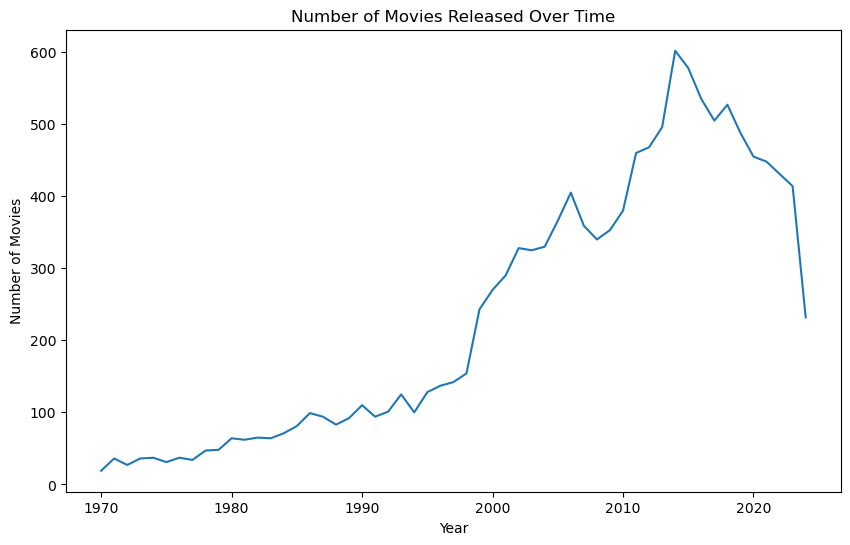

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of movies released per year
movies['Year'] = movies['Release Date'].dt.year
movies_per_year = movies.groupby('Year').size()

plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='line', title='Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

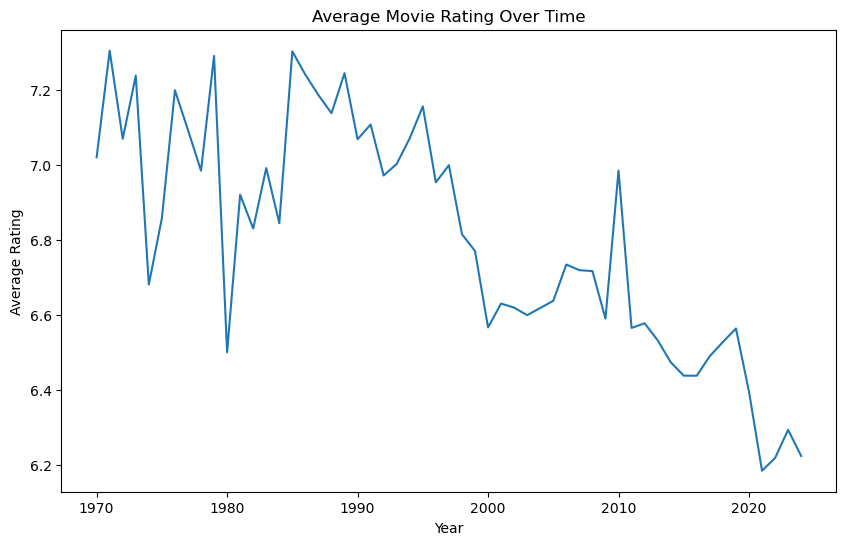

In [99]:
# Average rating per year
avg_rating_per_year = movies.groupby('Year')['Rating'].mean()

plt.figure(figsize=(10, 6))
avg_rating_per_year.plot(kind='line', title='Average Movie Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


<Figure size 1200x800 with 0 Axes>

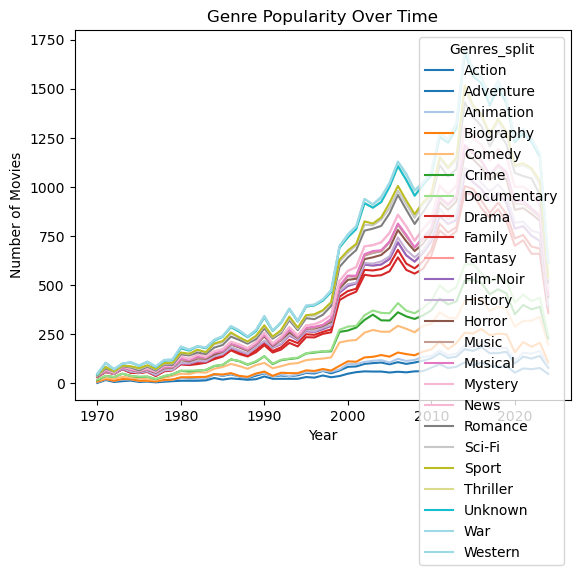

In [101]:
# Splitting genres and analyzing popularity
movies['Genres_split'] = movies['Genres'].str.split(',')
genre_exploded = movies.explode('Genres_split')

# Movie count by genre and year
genre_trend = genre_exploded.groupby(['Year', 'Genres_split']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
genre_trend.plot(kind='line', stacked=True, title='Genre Popularity Over Time', colormap='tab20')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


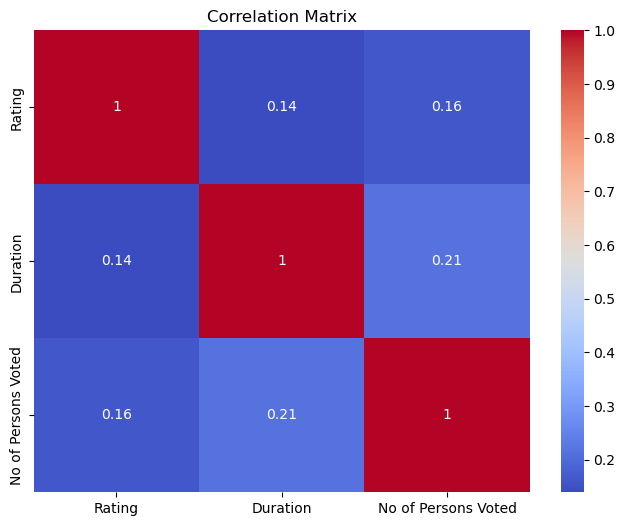

In [103]:
# Correlation heatmap
corr_matrix = movies[['Rating', 'Duration', 'No of Persons Voted']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [105]:
# Top 10 highest-rated movies
top_rated_movies = movies.sort_values(by='Rating', ascending=False).head(10)[['Title', 'Rating', 'Year']]
print(top_rated_movies)

# Directors with the highest average movie ratings
top_directors = movies.groupby('Directed by')['Rating'].mean().sort_values(ascending=False).head(10)
print(top_directors)


                    Title  Rating  Year
15958            Turk 182    10.0  1985
15537      Surviving Eden    10.0  2006
15299  A Hole in My Heart    10.0  2005
10076       Bad Behaviour     9.9  2024
15515               After     9.9  2014
7451            Cora Bora     9.9  2024
15514               After     9.9  2014
15513               After     9.9  2019
15512               After     9.9  2019
15320      Don't Tempt Me     9.8  2003
Directed by
Hannah Pearl Utt                            9.9
Pieter Gaspersz                             9.9
Alice Englert                               9.9
Agustín Díaz Yanes                          9.8
Micki Dickoff, \n    \n      Tony Pagano    9.8
Melissa Painter                             9.8
Jason Freeland                              9.8
James M. Hausler                            9.8
Bret Carr                                   9.8
Laurice Guillen                             9.8
Name: Rating, dtype: float64


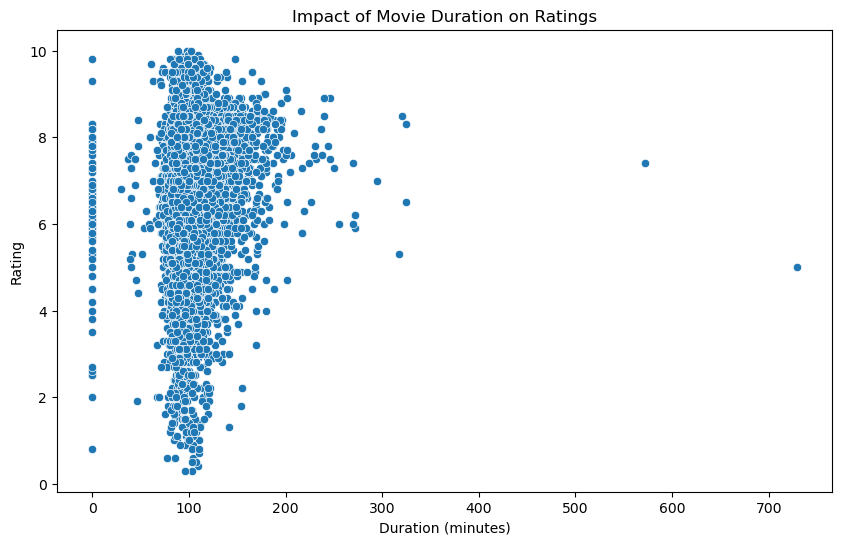

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=movies)
plt.title('Impact of Movie Duration on Ratings')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()


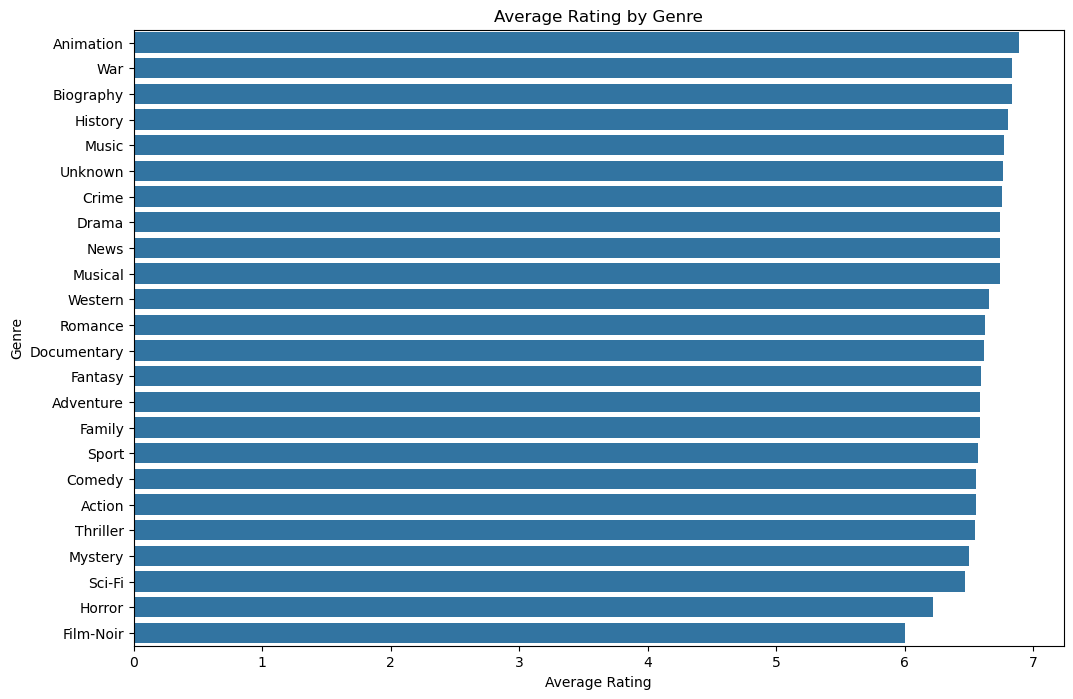

In [111]:
# Average rating by genre
genre_ratings = genre_exploded.groupby('Genres_split')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index)
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()
